In [1]:
#Endurance - find density from upper and lower hybrid lines 

import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/Endurance/')
import end_load_data
import end_functions as end
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import plasma_params_get_density_from_flhr_freq as dflh
import plasma_params_get_flhr_freq as dflh2
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/')
import plot_spectrogram as ps
from scipy import signal

import numpy as np 
import matplotlib.pyplot as plt
import plasmapy
from astropy import units as u  

#%load_ext nb_black
plt.rcParams['figure.figsize'] = [10, 4]

"""Enable auto module reloading"""
#%load_ext autoreload
#%autoreload 2


"""Load mag data"""
mag = end_load_data.mag_dc()


"""Load E-field VLF data"""
evlf = end_load_data.efield_vlf()


"""Load E-field HF data"""
ehf = end_load_data.efield_hf()





/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:41: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


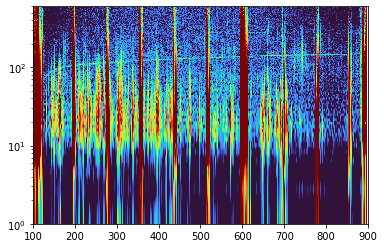

array([[-2.56840153e+01, -3.27140579e+01, -1.27696095e+01, ...,
        -1.12375145e+02, -1.14270172e+02, -1.77646393e+02],
       [ 4.05738640e+00, -6.84521151e+00, -1.86027408e-01, ...,
        -9.62191467e+01, -9.38495636e+01, -1.91889572e+02],
       [ 2.50807953e+00, -2.74969125e+00, -6.72186327e+00, ...,
        -9.45710831e+01, -9.71329117e+01, -1.92961670e+02],
       ...,
       [-3.65242882e+01, -3.99078217e+01, -4.35249634e+01, ...,
        -9.76963425e+01, -9.51384888e+01, -3.36032379e+02],
       [-4.04822693e+01, -3.43185081e+01, -4.31519356e+01, ...,
        -9.46656723e+01, -9.74427643e+01, -3.36032440e+02],
       [-5.72409821e+01, -5.33333130e+01, -3.75973854e+01, ...,
        -1.07678291e+02, -1.02038155e+02,            -inf]], dtype=float32)

In [2]:
#Plot VLF spectra with overplotted ion cyclotron harmonic lines 

fs = evlf.samplerate
freq12, tspec12, power12 = signal.spectrogram(evlf.dvlf12_mvm, fs, nperseg=16384, noverlap=16384/2., return_onesided=True)


#Left cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-28], xr=[100,300],yr=[4000,9000],zscale='log')

#Right cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-45], xr=[700,900],yr=[4000,9000],zscale='log')

#central cyclotron waves
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-65], xr=[100,800],yr=[2000,9000],zscale='log')


#Plot low freqs to find non-contaminated times 
ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-40], xr=[100,900],yr=[1,600],zscale='log',yscale='log')
#ps.plot_spectrogram(tspec12,freq12,power12,vr=vr[-80,-40], xr=[100,900],yr=[5000,9000],zscale='log',yscale='linear')
#ps.plot_spectrogram(tspec12,freq12,power12,vr=vr[-80,-40], xr=[100,900],yr=[5000,9000],zscale='log',yscale='linear')



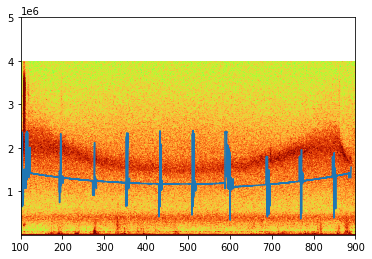

array([[ 53.60861  ,  53.20024  ,  53.55926  , ...,  53.09557  ,
         58.49614  ,  55.84085  ],
       [ 47.58824  ,  46.30793  ,  47.532238 , ...,  47.092606 ,
         52.526466 ,  50.100533 ],
       [-38.1946   ,  26.306574 ,  -4.689918 , ...,  17.299269 ,
         21.055187 ,  24.82892  ],
       ...,
       [-25.13348  , -37.594124 ,  -9.7548895, ..., -29.55006  ,
        -47.538662 , -11.7932415],
       [-31.767786 , -32.74528  ,  -2.4192593, ..., -29.383606 ,
        -45.296967 , -11.759544 ],
       [-28.439548 , -28.428303 ,  -6.2931867, ..., -26.218697 ,
        -43.015553 ,  -5.9207287]], dtype=float32)

In [3]:
#Plot HF spectra with overplotted fce

#%matplotlib tk


hf12 = ehf.afftpow12
#hf34 = ehf.afftpow34
hffreqs = ehf.afreq
hftimes = ehf.atimesfft


Bo = signal.decimate(mag.Bmag, 10)
tvals = signal.decimate(mag.tsec,10)
fcet = [28*i for i in Bo]


vr = [-45,-25]
#yr = [2e3, 2.6e6]
yr = [2e3, 5e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tvals, fcet)
ps.plot_spectrogram(hftimes, hffreqs, hf12,vr=vr, yscale='linear', zscale='linear', xr=xr, yr=yr, ax=axs)




range(0, 15)
117 7538.0 Hz 9799.4 Hz
139 8241.0 Hz 10713.300000000001 Hz
167 7882.0 Hz 10246.6 Hz
206 7338.0 Hz 9539.4 Hz
264 6956.0 Hz 9042.800000000001 Hz
335 6613.0 Hz 8596.9 Hz
420 6476.0 Hz 8418.800000000001 Hz
479 6438.0 Hz 8369.4 Hz
574 6632.0 Hz 8621.6 Hz
666 6997.0 Hz 9096.1 Hz
759 7426.0 Hz 9653.800000000001 Hz
817 7858.0 Hz 10215.4 Hz
850 7515.0 Hz 9769.5 Hz
868 5733.0 Hz 7452.900000000001 Hz
879 4711.0 Hz 6124.3 Hz
2683.8655996385005
3297.0781318170543
3004.3159351805375
2580.168816651202
2314.0343654405533
2084.5031827316843
2001.9847624185772
1978.5004154258763
2109.4477370192712
2407.3522146391974
2704.6678558931844
3028.375740269323
2709.8572824335215
1497.5319736427296
989.6122464309017
2683.8655996385005 1 / cm3
3297.0781318170543 1 / cm3
3004.3159351805375 1 / cm3
2580.168816651202 1 / cm3
2314.0343654405533 1 / cm3
2084.5031827316843 1 / cm3
2001.9847624185772 1 / cm3
1978.5004154258763 1 / cm3
2109.4477370192712 1 / cm3
2407.3522146391974 1 / cm3
2704.6678558931844

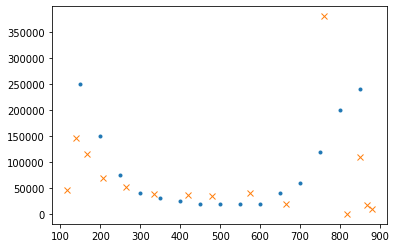

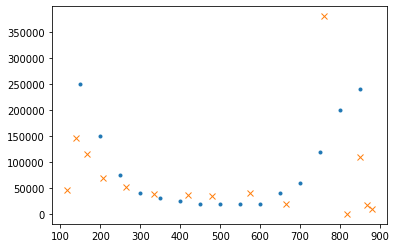

[45800.99777117894, 146644.88387914945, 116408.5737340548, 69732.06626181993, 50942.68930011438, 39258.5648028194, 35891.005583981234, 34333.628133206475, 40971.001879235635, 19366.83538745296, 380925.1648093854, 0, 108804.57192032698, 16772.299148713653, 8514.010056956882] [1367.1544599866795, 1665.2171719301255, 1520.661994756691, 1310.3459033101226, 1172.3991885997314, 1055.4283503181466, 1010.819567082606, 998.0600599221806, 1062.5387981812885, 1142.5483069416982, 1362.7811025838794, 1533.0622326568343, 1382.844998321177, 777.3496003409264, 516.9861684310389] [136442.92871000263, 0, 0, 0, 385583.0935731651, 150951.86169570882, 121811.03437045585, 108212.40336704048, 176449.90185805233, 28723.578623383783, 0, 0, 0, 28936.654793208003, 12445.3952752462]


AttributeError: 'numpy.float64' object has no attribute 'value'

In [9]:
#Estimate density from lower hybrid line. Need to do this first b/c I'm not sure which line to select for upper hybrid. 

###RESULT: THIS IS GIVING ME VALUES THAT DON'T LINE UP TO THE UPPER HYBRID NOISE. MOST OF THE UH AND FPE FREQS ARE TOO HIGH.

#fs = evlf.samplerate
#freq12, tspec12, power12 = signal.spectrogram(evlf.dvlf12_mvm, fs, nperseg=16384, noverlap=16384/2., return_onesided=True)
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-60], xr=[300,500],yr=[4000,10000],zscale='log')


#flh identification 
tlh = [117,139,167,206,264,335,420,479,574,666,759,817,850,868,879]
flh = [7538,8241,7882,7338,6956,6613,6476,6438,6632,6997,7426,7858,7515,5733,4711] #* u.Hz


print(range(len(tlh)))

fce = []
Bo = []
for i in range(len(tlh)):
    goo = np.squeeze(np.where(mag.tsec > tlh[i]))
    fce.append(28.*mag.Bmag[goo[0]])
    Bo.append(mag.Bmag[goo[0]])


flh = flh * u.Hz 
fce = fce * u.Hz 
Bo = Bo * u.nT



for i in range(len(tlh)): print(tlh[i], flh[i], flh[i]*1.3)



nH_ne = np.full(len(tlh),0.02) * u.dimensionless_unscaled 
nO_ne = np.full(len(tlh),0.98) * u.dimensionless_unscaled 


ne1 = dflh.dens_IonMassFractions(flh, fce, nH_ne, nO_ne)
ne2 = dflh.dens_singleion(flh, Bo, 'H+')
ne3 = dflh.dens_singleion(flh, Bo, 'O+')


ne1 = [i.value if not np.isnan(i) else 0 for i in ne1]
ne2 = [i.value if not np.isnan(i) else 0 for i in ne2]
ne3 = [i.value if not np.isnan(i) else 0 for i in ne3]

print(np.max(ne1)/1e5, np.max(ne2)/1e5, np.max(ne3)/1e5)






fpe1 = [8980*np.sqrt(i) for i in ne1]
fpe2 = [8980*np.sqrt(i) for i in ne2]
fpe3 = [8980*np.sqrt(i) for i in ne3]

fce = [i.value for i in fce]


fuh1 = [np.sqrt(fpe1[i]**2 + fce[i]**2) for i in range(len(fce))]
fuh2 = [np.sqrt(fpe2[i]**2 + fce[i]**2) for i in range(len(fce))]
fuh3 = [np.sqrt(fpe3[i]**2 + fce[i]**2) for i in range(len(fce))]

#fL=0 cutoff 
fL01 = [-1*(fce[i]/2) + np.sqrt(fpe1[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]
fL02 = [-1*(fce[i]/2) + np.sqrt(fpe2[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]
fL03 = [-1*(fce[i]/2) + np.sqrt(fpe3[i]**2 + (fce[i]/2.)**2) for i in range(len(fce))]


for i in range(len(fce)):
    print(tlh[i], fL03[i]/1e6, fce[i]/1e6, fpe3[i]/1e6, fuh3[i]/1e6)




vr = [-28,-25]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tvals, fcet)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

axs.plot(tlh, fuh3)
axs.plot(tlh, fL03)


ps.plot_spectrogram(hftimes, hffreqs, hf12,vr=vr, yscale='linear', zscale='linear', xr=xr, yr=yr, ax=axs)





In [ ]:
#Estimate density from upper hybrid line and use this to determine what the lower hybrid freq must be. 

#cd = cold_plasma_dispersion(epol=1,freq=1000.,dens=1000.,Bo=43000.,H_plus=0.1,O_plus=0.9)


#Estimate range of upper hybrid values based on lower/upper bounds and maximum
tvals = [100,200,300,400,500,610,700,800,860]
fuhl = [1.88,1.81,1.57,1.44,1.42,1.44,1.6,1.83,1.78]
fuhl = [i*1e6 for i in fuhl]
fuhm = [2.19,1.94,1.69,1.56,1.51,1.58,1.75,2.05,1.91]
fuhm = [i*1e6 for i in fuhm]
fuhh = [2.5,2.13,1.76,1.65,1.62,1.68,1.86,2.25,2.07]
fuhh = [i*1e6 for i in fuhh]
tmiddle = [98,106,123,147,171,206,241,259,285,409,519,585,651,668,743,811,859,868,879,889]
fuh_middle = [1.92,2.04,2.11,2.09,2.05,1.94,1.83,1.77,1.69,1.55,1.54,1.58,1.64,1.68,1.87,2.01,2.10,1.85,1.73,1.58]


#Now overplot these determined values on the upper hybrid plot
vr = [-30,-24]
yr = [2e3, 2.6e6]
xr = [820,900]

fig, axs = plt.subplots()

#axs.plot(tvals, fuhl)
#axs.plot(tmiddle, fuhm)
#axs.plot(tvals, fuhh)
#axs.set_ylim(yr[0],yr[1])
#axs.set_xlim(xr[0],xr[1])

ps.plot_spectrogram(hftimes, hffreqs, hf12,vr=vr, yscale='linear', zscale='linear', xr=xr, yr=yr, ax=axs)



#Find cyclotron frequenies at these times
fcevals = []
Bo = []
for i in range(len(tvals)):
    goo = np.squeeze(np.where(mag['tsec'] >= tvals[i]))
    good = goo[0]
    fcevals.append(28*mag['Bmag'][good])
    Bo.append(mag['Bmag'][good] * u.nT)




fcHt = [i/1836 for i in fcevals]

#Get harmonics of fcH
nvals = list(range(6,13,1))
fcHth = harmonics(fcHt, nvals)


fpel = [np.sqrt(fuhl[i]**2 - fcevals[i]**2) for i in range(len(fuhl))]
fpem = [np.sqrt(fuhm[i]**2 - fcevals[i]**2) for i in range(len(fuhm))]
fpeh = [np.sqrt(fuhh[i]**2 - fcevals[i]**2) for i in range(len(fuhh))]


nl = [(i/8980)**2 * u.cm**-3 for i in fpel]
nm = [(i/8980)**2 * u.cm**-3 for i in fpem]
nh = [(i/8980)**2 * u.cm**-3 for i in fpeh]

#flhl = dflh2.flhr_singleion(nl, Bo, 'O+')
#flhm = dflh2.flhr_singleion(nm, Bo, 'O+')
#flhh = dflh2.flhr_singleion(nh, Bo, 'O+')
#flhl = dflh2.flhr_singleion(nl, Bo, 'H+')
#flhm = dflh2.flhr_singleion(nm, Bo, 'H+')
#flhh = dflh2.flhr_singleion(nh, Bo, 'H+')

nH_ne = np.ndarray.tolist(np.full(len(tvals),0.005) * u.dimensionless_unscaled)
nO_ne = np.ndarray.tolist(np.full(len(tvals),0.995) * u.dimensionless_unscaled)

fcevals = [i*u.Hz for i in fcevals]
flhl = dflh2.flhr_IonMassFractions(nl, fcevals, nH_ne, nO_ne)
flhm = dflh2.flhr_IonMassFractions(nm, fcevals, nH_ne, nO_ne)
flhh = dflh2.flhr_IonMassFractions(nh, fcevals, nH_ne, nO_ne)

flhl = [i.value for i in flhl]
flhm = [i.value for i in flhm]
flhh = [i.value for i in flhh]



vr = [-80,-40]
yr = [3000, 9000]
xr = [100,900]

fig, axs = plt.subplots()

#axs.plot(tvals, flhl)
axs.plot(tvals, flhm, color='pink')
#axs.plot(tvals, flhh)

#plot harmonics
for n in range(len(nvals)):
    axs.plot(tvals, fcHth[:,n], color='red')
axs.plot(tvals, fcHt, color='red')



axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])


ps.plot_spectrogram(tspec12, freq12, power12,vr=vr, yscale='linear', zscale='log', xr=xr, yr=yr, ax=axs)


print('here')





In [ ]:

#Test to see if the lower bound is the fpe cutoff and the upper bound is fUH 
fUHtst = [np.sqrt(fcevals[i]**2 + fuhl[i]**2) for i in range(len(fuhl))]



vr = [-28,-25]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tvals, fUHtst)
axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

ps.plot_spectrogram(hftimes, hffreqs, hf12,vr=vr, yscale='linear', zscale='linear', xr=xr, yr=yr, ax=axs)






In [ ]:
#Assume that the middle value is the actual fUH (Rob's suggestion).
#Calculate density

tmiddle = [98,123,147,171,206,241,259,285,409,519,585,651,668,743,811,860,868,879,889]
fuh_middle = [1.92,2.11,2.09,2.05,1.94,1.83,1.77,1.69,1.55,1.54,1.58,1.64,1.68,1.88,2.04,2.10,1.85,1.73,1.58]


#kludge factor so that over-underdense crossover occurs at location LH/cyclotron waves light up
kludge_amt = 0.04e6
fuh_middle = [i*1e6 - kludge_amt for i in fuh_middle]


#Find cyclotron frequencies at these times
fcevals = []
Bo = []
Bomag = []
for i in range(len(tmiddle)):
    goo = np.squeeze(np.where(mag['tsec'] >= tmiddle[i]))
    good = goo[0]
    fcevals.append(28*mag['Bmag'][good])
    Bo.append(mag['Bmag'][good] * u.nT)
    Bomag.append(mag['Bmag'][good])


#plt.plot(mag['tsec'],mag['Bmag'])
#plt.xlim(860,900)

#fpe 
fpev = [np.sqrt(fuh_middle[i]**2 - fcevals[i]**2) for i in range(len(fcevals))]

ne = [(i/8980)**2 * u.cm**-3 for i in fpev]
ne_mag = [i.value for i in ne]

plt.scatter(tmiddle, ne_mag)
plt.xlim(100,900)


#Now overplot these determined values on the upper hybrid plot
vr = [-30,-24]
yr = [2e3, 2.6e6]
xr = [100,900]

fig, axs = plt.subplots()

axs.plot(tmiddle, fuh_middle, color='red')
axs.plot(tmiddle, fpev, color='orange')
axs.plot(tmiddle, fcevals, color='pink')


ps.plot_spectrogram(hftimes, hffreqs, hf12,vr=vr, yscale='linear', zscale='linear', xr=xr, yr=yr, ax=axs)


#get harmonics of fcH
nvals = list(range(6,13,1))
fcHh = end.harmonics(fcHt, nvals)



fcevals = [i*u.Hz for i in fcevals]






nH_ne = np.ndarray.tolist(np.full(len(tmiddle),0.08) * u.dimensionless_unscaled)
nO_ne = np.ndarray.tolist(np.full(len(tmiddle),0.92) * u.dimensionless_unscaled)

flh = dflh2.flhr_IonMassFractions(ne, fcevals, nH_ne, nO_ne)
flh = [i.value for i in flh]


vr = [-80,-60]
yr = [0, 12000]
xr = [800,900]

fig, axs = plt.subplots()

#axs.plot(tvals, flhl)
axs.plot(tmiddle, flh, color='pink')
#axs.plot(tvals, flhh)

axs.plot(tmiddle, fcHt, color='red')
for i in range(len(nvals)):
    axs.plot(tmiddle, fcHh[:,i], color='red')




axs.set_ylim(yr[0],yr[1])
axs.set_xlim(xr[0],xr[1])

ps.plot_spectrogram(tspec12, freq12, power12, vr=vr, yscale='linear', zscale='log', xr=xr, yr=yr, ax=axs)


print('here')




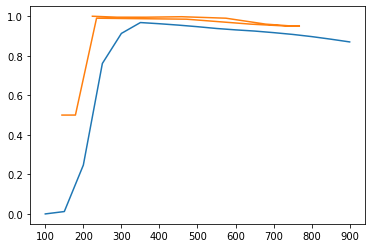

In [41]:
#Use Aroh's density values to determine fpe and fuh and then O+ to H+ fractions

#taroh = list(range(150,900,50))
taroh = [135,200,250,300,350,400,450,500,550,600,650,700,750,800,840,870]
daroh = [2.75,1.5,0.75,0.4,0.3,0.25,0.2,0.2,0.2,0.2,0.4,0.6,1.2,2,2.4,1]
daroh = [i*1e5 for i in daroh]



#flh identification 
tlh = [117,139,167,206,264,335,420,479,574,666,759,817,850,868,879]
flh = [7538,8241,7882,7338,6956,6613,6476,6438,6632,6997,7426,7858,7515,5733,4711] * u.Hz
fpearoh = [8980.*np.sqrt(i) for i in daroh]



fce = []
Bo = []
Bomag = []
for i in range(len(tlh)):
    goo = np.squeeze(np.where(mag.tsec >= tlh[i]))
    good = goo[0]
    fce.append(28*mag.Bmag[good])
    Bo.append(mag.Bmag[good] * u.nT)
    Bomag.append(mag.Bmag[good])


#fuhaoh = [np.sqrt(fpearoh[i]**2 + fce[i]**2) for i in range(len(fpearoh))]


#flh = flh * u.Hz 
fce = fce * u.Hz 
Bo = Bo * u.nT



#nH_ne = np.full(len(tlh),0.05) * u.dimensionless_unscaled 
#nO_ne = np.full(len(tlh),0.95) * u.dimensionless_unscaled 
nH_ne = [0.0001,0.0049,0.005,0.0025,0.01,0.04,0.05,0.05,0.05,0.04,0.015,0.012,0.01,0.5,0.5] * u.dimensionless_unscaled 
nO_ne = [1-i for i in nH_ne] * u.dimensionless_unscaled 

ne1 = dflh.dens_IonMassFractions(flh, fce, nH_ne, nO_ne)
ne2 = dflh.dens_singleion(flh, Bo, 'H+')
ne3 = dflh.dens_singleion(flh, Bo, 'O+')


ne1 = [i.value if not np.isnan(i) else 0 for i in ne1]
ne2 = [i.value if not np.isnan(i) else 0 for i in ne2]
ne3 = [i.value if not np.isnan(i) else 0 for i in ne3]

#print(np.max(ne1)/1e5, np.max(ne2)/1e5, np.max(ne3)/1e5)



#plt.plot(taroh,daroh,'.',tlh,ne1,'x')
#plt.show()
#print("here")


#----------------------------------------------
#Rough altitude comparison with IRI model O+ % 


import pandas as pd 

path = '/Users/abrenema/Desktop/Research/Rocket_missions/Endurance/data/'
folder = 'ephemeris'
fn = 'Endurance_GPS_velocity_position_altitude.csv'

header = ['time','xvel','yvel','zvel','lat','long','alt']
ephem =  pd.read_csv(path + folder + '/' + fn, skiprows=1, names=header)


#IRI O+ % 
alt_iri = [100.00,150.00,200.00,250.00,300.00,350.00,400.00,450.00,500.00,550.00,600.00,650.00,700.00,750.00,800.00,850.00,900.00]
Op_iri = [0.0,1.2,24.7,76.1,91.3,96.8,96.2,95.5,94.7,93.8,93.1,92.5,91.7,90.8,89.7,88.4,87.0]
Hp_iri = [0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.7,1.0,1.3,1.7,2.2,2.9,3.6,4.4]
Op_iri = [i/100 for i in Op_iri]
Hp_iri = [i/100 for i in Hp_iri]

#Associate rocket times with altitudes so I can compare to IRI
altv = np.asarray(ephem.alt)
alts = np.empty(len(tlh))
for i in range(len(tlh)):
    good = np.where(ephem.time >= tlh[i])
    good2 = good[0][0]
    alts[i] = altv[good2]


plt.plot(alt_iri, Op_iri, alts, nO_ne)
plt.show()



